In [17]:
import sys
import time
import dotenv
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from skmultilearn.model_selection import IterativeStratification
import json


In [18]:
env = dotenv.find_dotenv()

dataset_path = "/home/adel/Documents/Code/Ant-Miner/datasets/multi_label/cleaned/genbase.csv"
results_path = dotenv.get_key(env, 'MLC_RESULTS_DIR')
archive_path = dotenv.get_key(env, 'MLC_ARCHIVE_DIR')

In [19]:
args = {
    "task": "single",
    "population": 50,
    "neighbors": 10,
    "groups": 5,
    "min_examples": 10,
    "max_uncovered": 10,
    "max_iter": 100,
    "gamma": 0.9,
    "delta": 0.05,
    "alpha": 1,
    "beta": 1,
    "p": 0.9,
    "pruning": 0,
    "decomposition": "weighted",
    "archive_type": "rules",
    "rulesets": None,
    "ruleset_size": 2,
    "prediction_strat": "all",
    "cross_val": 0,
    "folds": 5,
    "random_state": None,
    "runs": 1,
}

In [20]:
folder = "CV" if args['cross_val'] else "ALL"
path = f"{archive_path}/MOEA_D_AM/{folder}"
dataset_name = dataset_path.split('/')[-1].split('.')[0]
pruning_sfx = '_p' if args['pruning'] else '_np'
decomposition_sfx =  '_ws' if args['decomposition'] == 'weighted' else '_tch'

# open archive
with open(f"{path}/{dataset_name}{decomposition_sfx}{pruning_sfx}_r{args['runs']}.json", 'r') as f:
    archive = json.load(f)

In [16]:
import matplotlib.pyplot as plt
import numpy as np

hv_histories = []
for run_id in range(1, args['runs'] + 1):
    run_hv_history = []
    hv_history = archive[f"{run_id}"]['hv']
    run_hv_history.append(hv_history)
    # average hv history across folds
    min_length = min(len(hv) for hv in run_hv_history)
    run_hv_history = [hv[:min_length] for hv in run_hv_history]
    avg_run_hv_history = np.mean(run_hv_history, axis=0)
    hv_histories.append(avg_run_hv_history)
    
# average hv history across runs
min_length = min(len(hv) for hv in hv_histories)
hv_histories = [hv[:min_length] for hv in hv_histories]
avg_hv_history = np.mean(hv_histories, axis=0)
std_hv_history = np.std(hv_histories, axis=0)

# --- Scientific Plot ---
plt.figure(figsize=(7, 5))

plt.title(f'tictactoe_100_ws_np', fontsize=12, weight='bold')


# Plot mean HV with circle markers
plt.plot(avg_hv_history, 
         color='black', linewidth=2, 
          markersize=4, 
         markerfacecolor='black',
         label='Avg Hypervolume')

# Shaded ± std band
plt.fill_between(range(len(avg_hv_history)),
                 avg_hv_history - std_hv_history,
                 avg_hv_history + std_hv_history,
                 color='gray', alpha=0.3, label='± Std. Dev')

# Labels & Style
plt.xlabel("Generations", fontsize=12)
plt.ylabel("Hypervolume (HV)", fontsize=12)
plt.xlim(left=0, right=100)
plt.ylim(bottom=0)
plt.legend(frameon=True, fontsize=10, loc="lower right")

# Subtle grid
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.6)
plt.tight_layout()

plt.show()

KeyError: '1'

In [43]:
folder = "CV" if args['cross_val'] else "ALL"
path = f"{archive_path}/MOEA_D_AM/{folder}/"
dataset_name = dataset_path.split('/')[-1].split('.')[0]
pruning_sfx = '_p' if args['pruning'] else '_np'
decomposition =  ['_ws', '_tch']

archive = []
# append archive:
for decomp in decomposition:
    with open(f"{path}/{dataset_name}{decomp}{pruning_sfx}_r{args['runs']}.json", 'r') as f:
        archive.append(json.load(f))

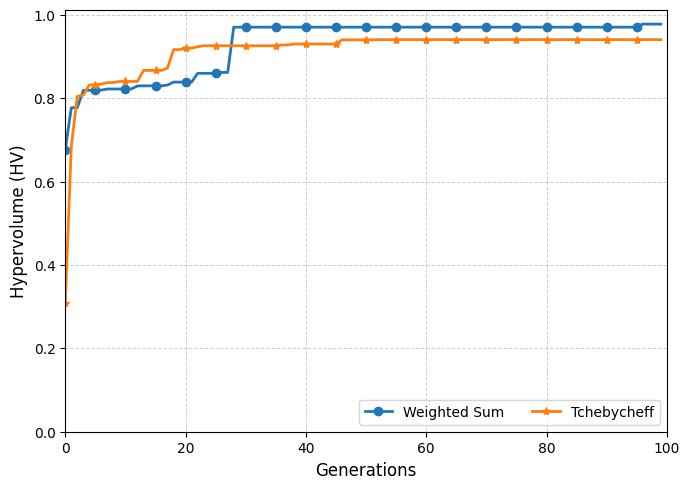

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Example: archive is a list of dicts (one per approach)
# archive = [archive_AR_WS, archive_AR_TCH, ...]
approaches = ["Weighted Sum", "Tchebycheff"]
line_styles = ['-', '-']
markers = ['o', '*']

# Tableau 10 inspired palette (you already had this)
colors = ["#1f77b4","#ff7f0e"]

plt.figure(figsize=(7, 5))

for idx, arch in enumerate(archive):
    hv_histories = []
    for run_id in range(1, args['runs'] + 1):
        run_hv_history = []
        hv_history = arch[f"{run_id}"]['hv']
        run_hv_history.append(hv_history)

        # average across folds
        min_length = min(len(hv) for hv in run_hv_history)
        run_hv_history = [hv[:min_length] for hv in run_hv_history]
        avg_run_hv_history = np.mean(run_hv_history, axis=0)
        hv_histories.append(avg_run_hv_history)

    # average across runs
    min_length = min(len(hv) for hv in hv_histories)
    hv_histories = [hv[:min_length] for hv in hv_histories]
    avg_hv_history = np.mean(hv_histories, axis=0)

    # --- Plot curve (NO std band) ---
    plt.plot(avg_hv_history,
             color=colors[idx % len(colors)],
             linewidth=2,
             label=approaches[idx],
             linestyle=line_styles[idx % len(line_styles)],
             marker=markers[idx % len(markers)],
             markevery=5)

# --- Plot formatting ---
plt.xlabel("Generations", fontsize=12)
plt.ylabel("Hypervolume (HV)", fontsize=12)
plt.xlim(left=0, right=100)
plt.ylim(bottom=0)
plt.legend(frameon=True, fontsize=10, loc="lower right", ncol=2)
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.6)
plt.tight_layout()
plt.show()


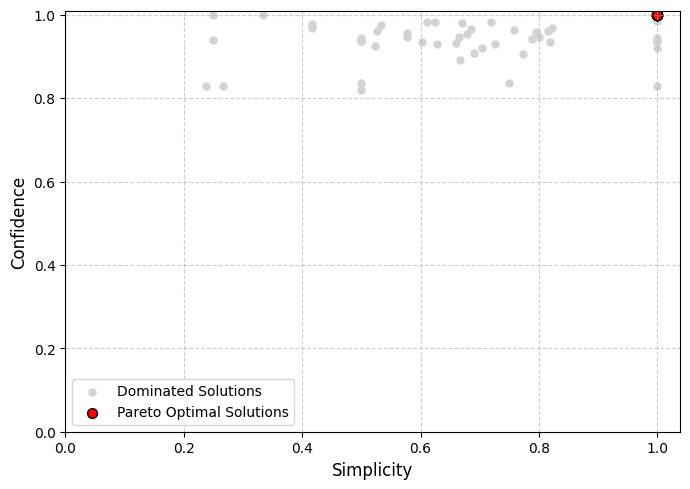

In [21]:
import matplotlib.pyplot as plt
import numpy as np

all_solutions = []
local_pareto = []

# --- Collect data ---
for run_id in range(1, args['runs'] + 1):
    run_data = archive[f"run_{run_id}"]

        # all solutions
    all_solutions.extend(run_data["all"])

        # local Pareto (archive)
    for sol in run_data["archive"]:
        local_pareto.append(sol['ruleset']["fitness"])

all_solutions = np.array(all_solutions, dtype=float).reshape(-1, 2)
local_pareto = np.array(local_pareto, dtype=float).reshape(-1, 2)

# --- Split all_solutions into dominated / non-dominated wrt archive ---
def is_dominated(point, archive):
    """Return True if point is dominated or equal to any in archive."""
    return any((a[0] >= point[0] and a[1] >= point[1]) for a in archive)

non_dominated_all = np.array([p for p in all_solutions if not is_dominated(p, local_pareto)])
dominated_all = np.array([p for p in all_solutions if is_dominated(p, local_pareto)])

# Ensure 2D shape
if non_dominated_all.size > 0:
    non_dominated_all = non_dominated_all.reshape(-1, 2)
if dominated_all.size > 0:
    dominated_all = dominated_all.reshape(-1, 2)

# --- Plot ---
plt.figure(figsize=(7, 5))

# dominated all solutions → very light grey
if dominated_all.size > 0:
    plt.scatter(dominated_all[:, 1], dominated_all[:, 0],
                color='lightgrey', alpha=1, s=25, label="Dominated Solutions")

# non-dominated all solutions → darker grey
if non_dominated_all.size > 0:
    plt.scatter(non_dominated_all[:, 1], non_dominated_all[:, 0],
                color='grey', alpha=1, s=25, label="Non-dominated (wrt Archive)")

# archive points → red
if local_pareto.size > 0:
    plt.scatter(local_pareto[:, 1], local_pareto[:, 0],
                color='red', edgecolor='black', s=50, label="Pareto Optimal Solutions")

plt.xlabel("Simplicity", fontsize=12)
plt.ylabel("Confidence", fontsize=12)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.legend(frameon=True, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
